In [1]:
import numpy as np
from ml_helpers import ml_helpers
from redis_management import RedisManagement as rmgt
from collections import OrderedDict


In [2]:
from sklearn.cluster import DBSCAN

In [3]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster.dbscan_:

class DBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      The maximum distance between two samples for them to be considered
 |      as in the same neighborhood.
 |  
 |  min_samples : int, optional
 |      The number of samples (or total weight) in a neighborhood for a point
 |      to be considered as a core point. This includes the point itself.
 |  
 |  metric : string, or callable
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must 

In [4]:
mat = np.load('matrix_first_vector.npy')
redis_h = rmgt('malwares')
ml_h= ml_helpers(redis_h.redis_client)
mat.shape


(724, 5)

# DBScan with the first vector

In [5]:
dbscan = DBSCAN(eps=0.001,min_samples=1, metric="euclidean",n_jobs=8)

In [6]:
dbscan.fit(mat)

DBSCAN(algorithm='auto', eps=0.001, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=8, p=None)

In [21]:
labels=dbscan.labels_.tolist()
len(set(labels))

346

In [8]:
all_malwares = ml_h.get_all_malwares
for index,l in enumerate(labels):
    ml_h.set_label(all_malwares[index],'DBscan','first_vector',l)

In [9]:
distrib = {}
for m in all_malwares:
    try:
        distrib[redis_h.client.hget(m,'DBscan_first_vector')].append((m,redis_h.client.hget(m,'label')))
    except KeyError:
        distrib[redis_h.client.hget(m,'DBscan_first_vector')] = [(m,redis_h.client.hget(m,'label'))]

In [10]:
distrib

{b'0': [(b'0008065861f5b09195e51add72dacd3c4bbce6444711320ad349c7dab5bb97fb',
   b'VolatileCedar.Explosion')],
 b'1': [(b'003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9',
   b'EquationGroup.Fanny'),
  (b'022224bfad26bab87cf5f4b17981a4224ef8fa6919520b3bc2946234efda1e11',
   b'EquationGroup'),
  (b'0269085bb03ba9030209b0d95f0dd65f80539c27ea376eb2a8f11c68bf60cb8a',
   b'EquationGroup'),
  (b'037bdc95919b1d3d65af6202e8c9c9ca3caba7a863e4e39162b93fa032881feb',
   b'EquationGroup'),
  (b'0404b8957c27de20bebb133d3cf0a28e30700f667f7c2f3fe7fde7e726b691cd',
   b'EquationGroup'),
  (b'045f0ecae2362355f06d4fc8fa97e577daad1e01e6f0c0523b5b0f9e15306c74',
   b'EquationGroup'),
  (b'06cd057c035acbff3e9294860053ce9ec237a166e52018b6651250fa99e1a8a0',
   b'EquationGroup'),
  (b'083c64c404ac1ea6df1a4cb6eafa91ef90b7abacc54547cf008cd74e77195746',
   b'EquationGroup'),
  (b'0a39d48ce6fddd2feb5aefb26c3f437cf460dbf8670544ae9f1bd594856ac178',
   b'EquationGroup'),
  (b'0ac533252bd0595e5f983da38c

dict_keys([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13', b'14', b'15', b'16', b'17', b'18', b'19', b'20', b'21', b'22', b'23', b'24', b'25', b'26', b'27', b'28', b'29', b'30', b'31', b'32', b'33', b'34', b'35', b'36', b'37', b'38', b'39', b'40', b'41', b'42', b'43', b'44', b'45', b'46', b'47', b'48', b'49', b'50', b'51', b'52', b'53', b'54', b'55', b'56', b'57', b'58', b'59', b'60', b'61', b'62', b'63', b'64', b'65', b'66', b'67', b'68', b'69', b'70', b'71', b'72', b'73', b'74', b'75', b'76', b'77', b'78', b'79', b'80', b'81', b'82', b'83', b'84', b'85', b'86', b'87', b'88', b'89', b'90', b'91', b'92', b'93', b'94', b'95', b'96', b'97', b'98', b'99', b'100', b'101', b'102', b'103', b'104', b'105', b'106', b'107', b'108', b'109', b'110', b'111', b'112', b'113', b'114', b'115', b'116', b'117', b'118', b'119', b'120', b'121', b'122', b'123', b'124', b'125', b'126', b'127', b'128', b'129', b'130', b'131', b'132', b'133', b'134', b'135', b'136', b'1

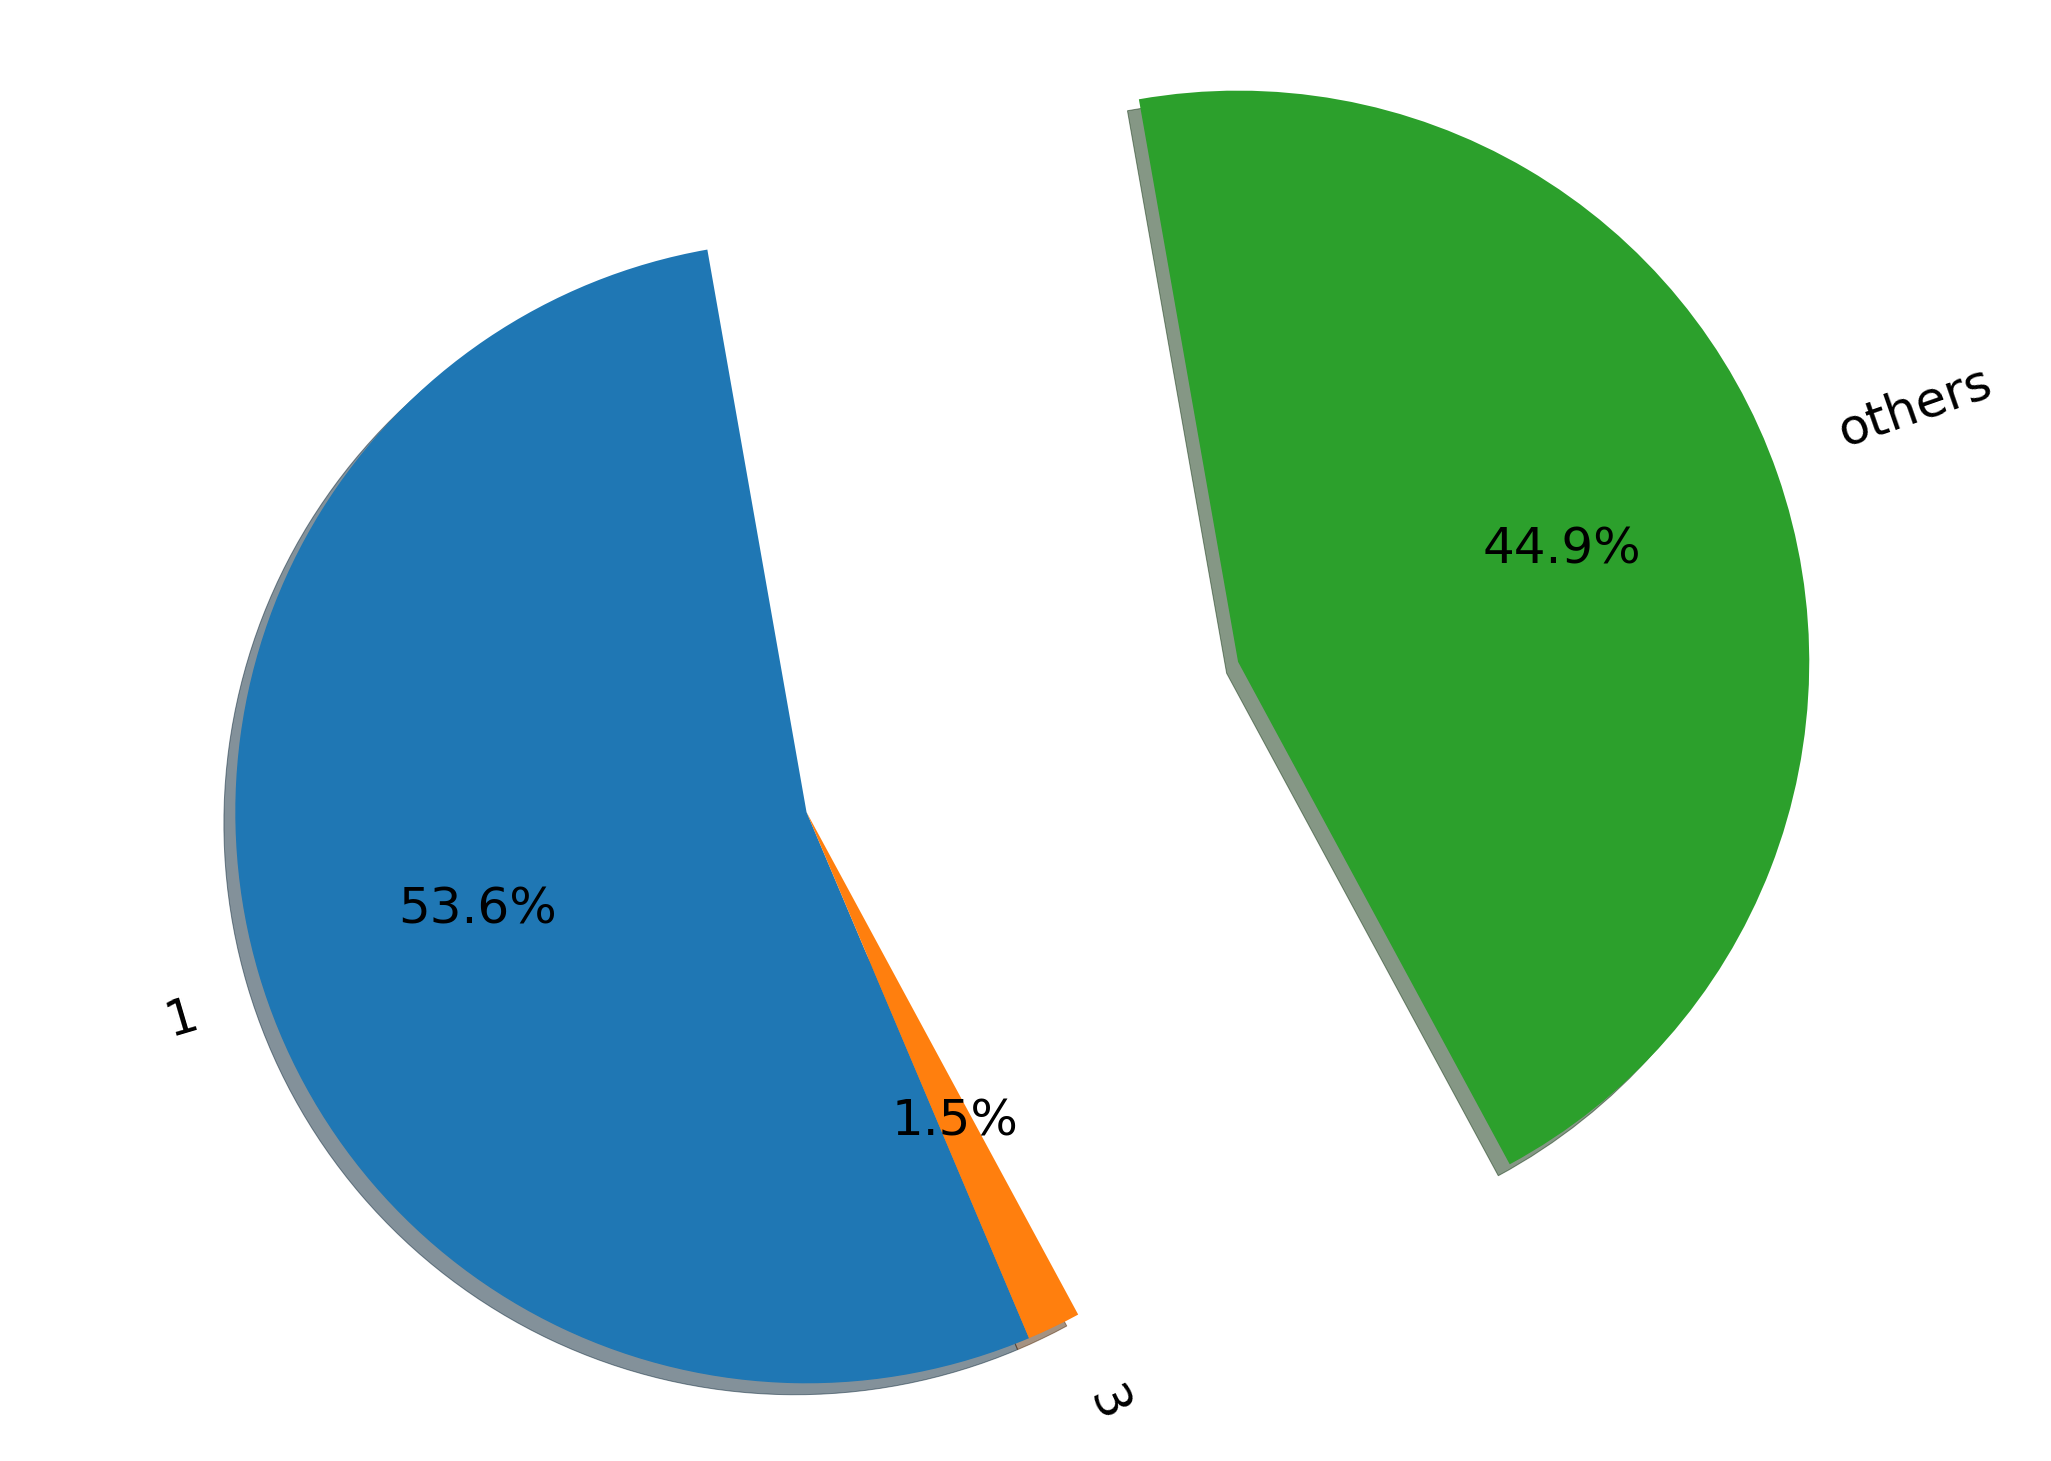

In [30]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
mpl.rcParams['font.size'] = 50.0

distrib_class_malware = { int(k):len(v) for k,v in distrib.items()}

labels = [ str(k) for k,v in distrib_class_malware.items() if v > 10 ]

labels.append('others')
explode=[ 0 for i in range(0,len(labels))]
explode[len(labels)-1] = 0.8
fig1, ax1 = plt.subplots()

rest = sum([ v for v in distrib_class_malware.values() if v < 10])
data = [ v for v in distrib_class_malware.values() if v > 10]
data.append(rest)

ax1.pie(data ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, rotatelabels =True, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.subplots_adjust(0.3,0,5,5)

plt.show()

In [22]:
histo = Counter( malware_fam for m,malware_fam in distrib[b'28'])
histo

Counter({b'EquationGroup': 29})

# Dbscan with the second vector

In [23]:
import numpy as np
from ml_helpers import ml_helpers
from redis_management import RedisManagement as rmgt
from collections import OrderedDict
from sklearn.cluster import DBSCAN

In [24]:
mat_second_vector = np.load('matrix_second_vector.npy')
redis_h = rmgt('malwares')
ml_h= ml_helpers(redis_h.redis_client)
mat_second_vector.shape


(724, 5)

In [25]:
dbscan = DBSCAN(eps=0.01,min_samples=1, metric="euclidean",n_jobs=8)

In [26]:
dbscan.fit(mat_second_vector)

DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=8, p=None)

In [27]:
labels=dbscan.labels_.tolist()

In [28]:
all_malwares = ml_h.get_all_malwares
for index,l in enumerate(labels):
    ml_h.set_label(all_malwares[index],'DBscan','second_vector',l)

In [48]:
distrib = {}
for m in all_malwares:
    try:
        distrib[redis_h.client.hget(m,'DBscan_second_vector')].append((m,redis_h.client.hget(m,'label')))
    except KeyError:
        distrib[redis_h.client.hget(m,'DBscan_second_vector')] = [(m,redis_h.client.hget(m,'label'))]

In [49]:
distrib.keys()

dict_keys([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'11', b'12', b'13', b'14', b'15', b'16', b'17', b'18', b'19', b'20', b'21', b'22', b'23', b'24', b'25', b'26', b'27', b'28', b'29', b'30', b'31', b'32', b'33', b'34', b'35', b'36', b'37', b'38', b'39', b'40', b'41', b'42', b'43', b'44', b'45', b'46', b'47', b'48', b'49', b'50', b'51', b'52', b'53', b'54', b'55', b'56', b'57', b'58', b'59', b'60', b'61', b'62', b'63', b'64', b'65', b'66', b'67', b'68', b'69', b'70', b'71', b'72', b'73', b'74', b'75', b'76', b'77', b'78', b'79', b'80', b'81', b'82', b'83', b'84', b'85', b'86', b'87', b'88', b'89', b'90', b'91', b'92', b'93', b'94', b'95', b'96', b'97', b'98', b'99', b'100', b'101', b'102', b'103', b'104', b'105', b'106', b'107', b'108', b'109', b'110', b'111', b'112', b'113', b'114', b'115', b'116', b'117', b'118', b'119', b'120', b'121', b'122', b'123', b'124', b'125', b'126', b'127', b'128', b'129', b'130', b'131', b'132', b'133', b'134', b'135', b'136', b'1

In [50]:
sorted([(k,len(v)) for k,v in distrib.items()],key= lambda x: x[1],reverse=True )

[(b'1', 388),
 (b'3', 11),
 (b'88', 9),
 (b'38', 8),
 (b'39', 8),
 (b'105', 8),
 (b'7', 6),
 (b'37', 6),
 (b'45', 6),
 (b'55', 6),
 (b'31', 5),
 (b'54', 5),
 (b'11', 4),
 (b'27', 4),
 (b'30', 4),
 (b'62', 4),
 (b'80', 4),
 (b'100', 4),
 (b'5', 3),
 (b'33', 3),
 (b'65', 3),
 (b'68', 3),
 (b'75', 3),
 (b'130', 3),
 (b'166', 3),
 (b'0', 2),
 (b'10', 2),
 (b'22', 2),
 (b'28', 2),
 (b'43', 2),
 (b'63', 2),
 (b'64', 2),
 (b'81', 2),
 (b'82', 2),
 (b'83', 2),
 (b'85', 2),
 (b'86', 2),
 (b'93', 2),
 (b'97', 2),
 (b'113', 2),
 (b'134', 2),
 (b'141', 2),
 (b'151', 2),
 (b'155', 2),
 (b'159', 2),
 (b'185', 2),
 (b'200', 2),
 (b'210', 2),
 (b'2', 1),
 (b'4', 1),
 (b'6', 1),
 (b'8', 1),
 (b'9', 1),
 (b'12', 1),
 (b'13', 1),
 (b'14', 1),
 (b'15', 1),
 (b'16', 1),
 (b'17', 1),
 (b'18', 1),
 (b'19', 1),
 (b'20', 1),
 (b'21', 1),
 (b'23', 1),
 (b'24', 1),
 (b'25', 1),
 (b'26', 1),
 (b'29', 1),
 (b'32', 1),
 (b'34', 1),
 (b'35', 1),
 (b'36', 1),
 (b'40', 1),
 (b'41', 1),
 (b'42', 1),
 (b'44', 1),
 (b'46

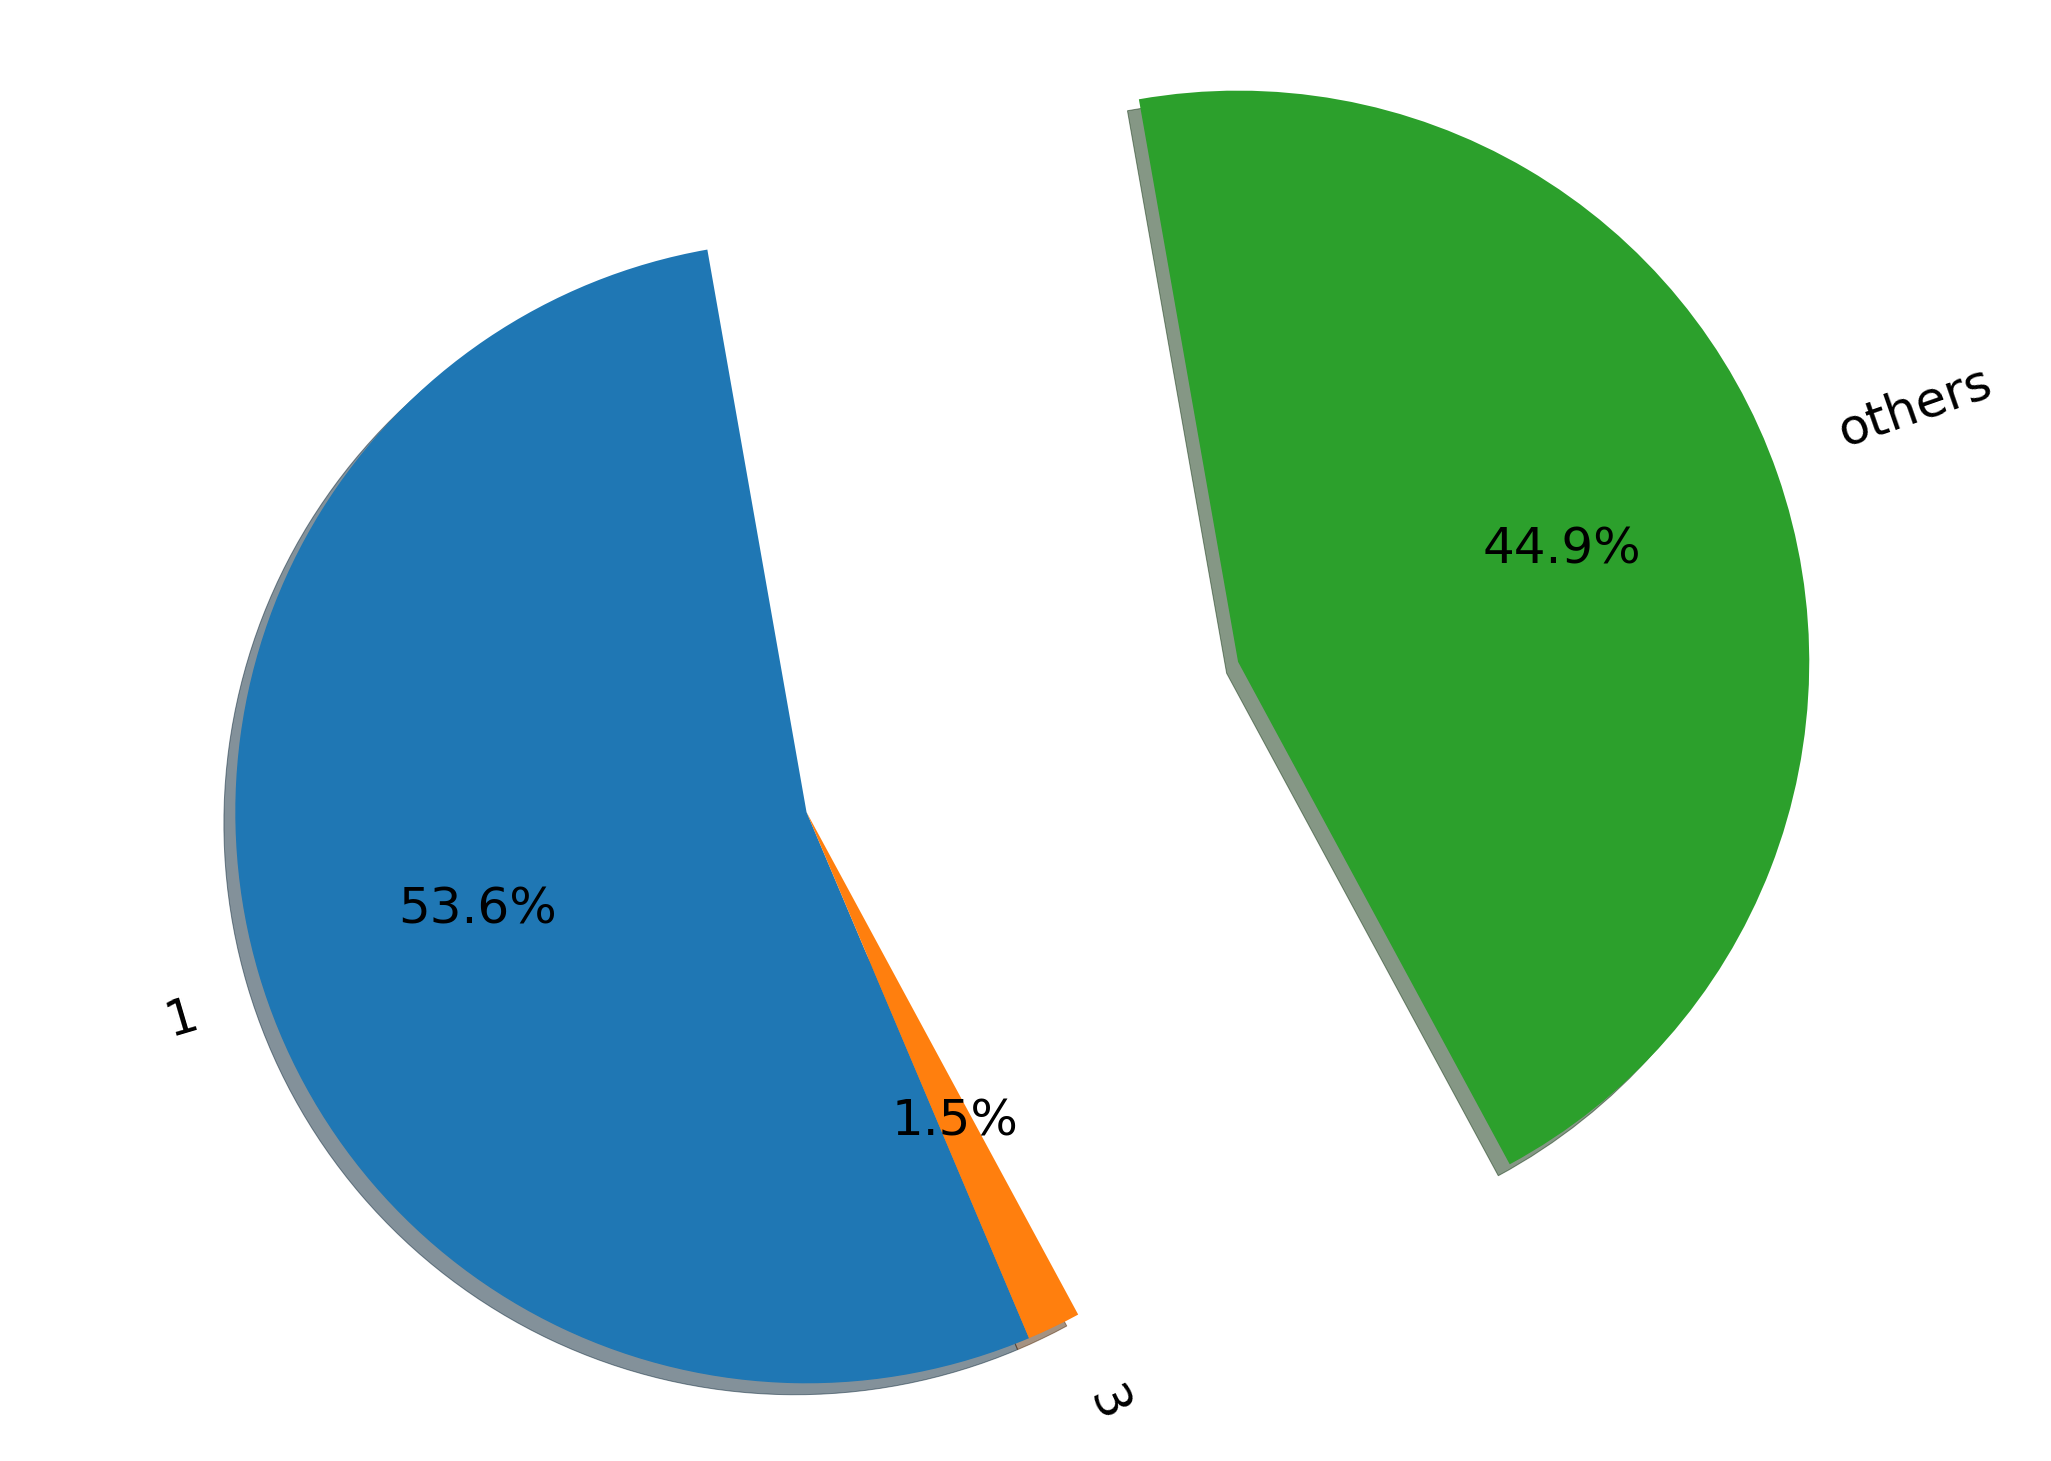

In [51]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
mpl.rcParams['font.size'] = 50.0

distrib_class_malware = { int(k):len(v) for k,v in distrib.items()}

labels = [ str(k) for k,v in distrib_class_malware.items() if v > 10 ]

labels.append('others')
explode=[ 0 for i in range(0,len(labels))]
explode[len(labels)-1] = 0.8
fig1, ax1 = plt.subplots()

rest = sum([ v for v in distrib_class_malware.values() if v < 10])
data = [ v for v in distrib_class_malware.values() if v > 10]
data.append(rest)

ax1.pie(data ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, rotatelabels =True, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.subplots_adjust(0.3,0,5,5)

plt.show()

In [52]:
distrib[b'1']

[(b'003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9',
  b'EquationGroup.Fanny'),
 (b'00b58e4f8525161379681c1532f83e7b85f432933d35dc139ec85bb680ddf633',
  b'EquationGroup'),
 (b'022224bfad26bab87cf5f4b17981a4224ef8fa6919520b3bc2946234efda1e11',
  b'EquationGroup'),
 (b'0269085bb03ba9030209b0d95f0dd65f80539c27ea376eb2a8f11c68bf60cb8a',
  b'EquationGroup'),
 (b'037bdc95919b1d3d65af6202e8c9c9ca3caba7a863e4e39162b93fa032881feb',
  b'EquationGroup'),
 (b'0404b8957c27de20bebb133d3cf0a28e30700f667f7c2f3fe7fde7e726b691cd',
  b'EquationGroup'),
 (b'043eec3e120c34cd0ac6c954c2ee6dd533a0a647367ee2ca2d5a508a4a8ac75c',
  b'EquationGroup'),
 (b'045f0ecae2362355f06d4fc8fa97e577daad1e01e6f0c0523b5b0f9e15306c74',
  b'EquationGroup'),
 (b'06cd057c035acbff3e9294860053ce9ec237a166e52018b6651250fa99e1a8a0',
  b'EquationGroup'),
 (b'07d57be320708e478b4b6075928302e1bf7c15856de36adaa0c02be36282e453',
  b'EquationGroup'),
 (b'083c64c404ac1ea6df1a4cb6eafa91ef90b7abacc54547cf008cd74e77195746',
  b

In [53]:
distrib[b'3']

[(b'03641e5632673615f23b2a8325d7355c4499a40f47b6ae094606a73c56e24ad0',
  b'VolatileCedar.Explosion'),
 (b'30196c83a1f857d36fde160d55bd4e5b5d50fbb082bd846db295cbe0f9d35cfb',
  b'VolatileCedar.Explosion'),
 (b'388f5bc2f088769b361dfe8a45f0d5237c4580b287612422a03babe6994339ff',
  b'VolatileCedar.Explosion'),
 (b'3bedb4bdb17718fda1edd1a8fa4289dc61fdda598474b5648414e4565e88ecd5',
  b'VolatileCedar.Explosion'),
 (b'50414f60d7e24d25f9ebb68f99d67a46e8b12458474ac503b6e0d0562075a985',
  b'VolatileCedar.Explosion'),
 (b'52cb02da0462fdd08d537b2c949e2e252f7a7a88354d596e9f5c9f1498d1c68f',
  b'VolatileCedar.Explosion'),
 (b'5663b2d4a4aec55d5d6fb507e3fdcb92ffc978d411de68b084c37f86af6d2e19',
  b'VolatileCedar.Explosion'),
 (b'5d491ea5705e90c817cf0f5211c9edbcd5291fe8bd4cc69cdb58e8d0e6b6d1fe',
  b'VolatileCedar.Explosion'),
 (b'bc12d7052e6cfce8f16625ca8b88803cd4e58356eb32fe62667336d4dee708a3',
  b'VolatileCedar.Explosion'),
 (b'd8fdcdaad652c19f4f4676cd2f89ae834dbc19e2759a206044b18601875f2726',
  b'Volatil

In [54]:
distrib[b'39']

[(b'24b7e7553b1aa241997e28775d3952c4cb885056c4606cbed9b450320b601255',
  b'EquationGroup.TripleFantasy'),
 (b'25753887a98551640f3733e962365b8af79af7d0894c29a27db58ab8392e270e',
  b'EquationGroup'),
 (b'4f72409c5fa309d1e077cd05e1fa5ea3c18ee157de44a48950b792e263496649',
  b'EquationGroup'),
 (b'74bde1ae6e20c78fd0bb75b2ad78de2f5460f0e803a2a189acb50b1d812c77ef',
  b'EquationGroup'),
 (b'9a553f094145b3e78af1873a0975896b1d46a9952c0a34ff3dbccddbda776800',
  b'EquationGroup'),
 (b'aa695a065838a6e1ddefb348a82a67e47caae606c149c9a37c7ee160b75e3679',
  b'EquationGroup'),
 (b'd1a8d74aadb10bff4bfda144e68db3e087ec4fee82cd22df22839fd5435d0d37',
  b'Win32.Avatar'),
 (b'edccf8c9a7184c80737767f414aad482c2d8fe17f437e2030617deacbaa5e763',
  b'EquationGroup')]

In [55]:
distrib[b'38']

[(b'22e681906d77bef7ac343a41be08c40974e7eab45886ab47512855f24cc85eb8',
  b'Trojan.Sinowal'),
 (b'3362bc975707c33550f037a84e59033a117b2abb5ded6f8c3539a92c98b8c6e2',
  b'Trojan.Sinowal'),
 (b'5f54e7cea69962c932927dd3d71cec1943539f1e13c1d84a971450d0ff109901',
  b'Trojan.Sinowal'),
 (b'624ba7ce581bf395d6b8f12547f900d58ca8c0c66ea6c20d66e532d3e8650187',
  b'Trojan.Sinowal'),
 (b'70484a2a2ba530d910ca3f3919b2e128579eda1c4f55248d865412d85ddf15cf',
  b'Trojan.Sinowal'),
 (b'9261bba9f30195328e8563020e92008cdce2369111368b4b6d6985eae269e9ff',
  b'Trojan.Sinowal'),
 (b'e8dc8fc7e3b763c2d70d8a714213d5d0fc79d04102881a80011cd073588df6e6',
  b'Trojan.Sinowal'),
 (b'ea8c6a377c474bcf7c34f642b8f6829591761da5b32d7a92ba1570ae498fb31b',
  b'Trojan.Sinowal')]

In [56]:
distrib[b'105']

[(b'683a09da219918258c58a7f61f7dc4161a3a7a377cf82a31b840baabfb9a4a96',
  b'Ransomware.Satana'),
 (b'9cd5127ef31da0e8a4e36292f2af5a9ec1de3b294da367d7c05786fe2d5de44f',
  b'Trojan.Regin'),
 (b'a0d82c3730bc41e267711480c8009883d1412b68977ab175421eabc34e4ef355',
  b'Trojan.Regin'),
 (b'a7e3ad8ea7edf1ca10b0e5b0d976675c3016e5933219f97e94900dea0d470abe',
  b'Trojan.Regin'),
 (b'ab8d308fd59a8db8a130fcfdb6db56c4f7717877c465be98f71284bdfccdfa25',
  b'PotaoExpress'),
 (b'b12c7d57507286bbbe36d7acf9b34c22c96606ffd904e3c23008399a4a50c047',
  b'Trojan.Regin'),
 (b'e1ba03a10a40aab909b2ba58dcdfd378b4d264f1f4a554b669797bbb8c8ac902',
  b'Trojan.Regin'),
 (b'f1d903251db466d35533c28e3c032b7212aa43c8d64ddf8c5521b43031e69e1e',
  b'Trojan.Regin')]

In [57]:
distrib[b'55']

[(b'34e6fb074284e58ca80961feda4fe651d6d658077914a528a4a6efa91ecc749d',
  b'PotaoExpress'),
 (b'3d78f52fa0c08d8bf3d42074bf76ee56aa233fb9a6bc76119998d085d94368ca',
  b'PotaoExpress'),
 (b'7492e84a30e890ebe3ca5140ad547965cc8c43f0a02f66be153b038a73ee5314',
  b'PotaoExpress'),
 (b'7d15bd854c1dfef847cdd3caabdf4ab81f2410ee5c7f91d377cc72eb81135ff4',
  b'PotaoExpress'),
 (b'b8b02cc57e45bcf500b433806e6a4f8af7f0ac0c5fc9adfd11820eebf4eb5d79',
  b'PotaoExpress'),
 (b'e3892d2d9f87ea848477529458d025898b24a6802eb4df13e96b0314334635d0',
  b'PotaoExpress')]

In [58]:
distrib[b'45']

[(b'2c9c3ddd4d93e687eb095444cef7668b21636b364bff55de953bdd1df40071da',
  b'Duqu2'),
 (b'2ecb26021d21fcef3d8bba63de0c888499110a2b78e4caa6fa07a2b27d87f71b',
  b'Duqu2'),
 (b'6c803aac51038ce308ee085f2cd82a055aaa9ba24d08a19efb2c0fcfde936c34',
  b'Duqu2'),
 (b'6e09e1a4f56ea736ff21ad5e188845615b57e1a5168f4bdaebe7ddc634912de9',
  b'Duqu2'),
 (b'c16410c49dc40a371be22773f420b7dd3cfd4d8205cf39909ad9a6f26f55718e',
  b'Duqu2'),
 (b'd12cd9490fd75e192ea053a05e869ed2f3f9748bf1563e6e496e7153fb4e6c98',
  b'Duqu2')]

In [59]:
distrib[b'37']

[(b'1fe6af3d704d2fc0c7acd58b069a31eec866668ec6e25f52354e6e61266db8db',
  b'PotaoExpress'),
 (b'244c181eb442fefcf1e1daf900896bee6569481c0e885e3c63efeef86cd64c55',
  b'PotaoExpress'),
 (b'76c7c67274cf5384615a120e69be3af64cc31d9c4f05ff2031120612443c8360',
  b'PotaoExpress'),
 (b'887a721254486263f1f3f25f3c677da62ef5c062c3afa7ef70c895bc8b17b424',
  b'PotaoExpress'),
 (b'b22a614a291111398657cf8d1fa64fa50ed9c66c66a0b09d08c53972c6536766',
  b'PotaoExpress'),
 (b'fcfdcbdd60f105af1362cfeb3decbbbbe09d5fc82bde6ee8dfd846b2b844f972',
  b'PotaoExpress')]

In [65]:
redis_h.client.hget(b'e3892d2d9f87ea848477529458d025898b24a6802eb4df13e96b0314334635d0','second_vector')

In [61]:
redis_h.client.hget('fcfdcbdd60f105af1362cfeb3decbbbbe09d5fc82bde6ee8dfd846b2b844f972','second_vector')

In [62]:
distrib[b'100']

[(b'6217cebf11a76c888cc6ae94f54597a877462ed70da49a88589a9197173cc072',
  b'Duqu2'),
 (b'9900c91f6d754f15f73729ce5a4333a718463e24aa7e6192c7527ec5c80dac42',
  b'Duqu2'),
 (b'd5c57788cf12b020c4083eb228911260b744a2a67c88662c9bab8faebca98fa2',
  b'Duqu2'),
 (b'e83c6c36dbd143ee0fd36aff30fb43529a34129817dc2530f251121527cbf4b4',
  b'Duqu2')]

In [63]:
redis_h.client.hget('6c803aac51038ce308ee085f2cd82a055aaa9ba24d08a19efb2c0fcfde936c34','second_vector')

In [64]:
redis_h.client.hget('6217cebf11a76c888cc6ae94f54597a877462ed70da49a88589a9197173cc072','second_vector')